 python program for finance 
 
    1. returns
    2. daily returns
    3. volatility

In [0]:
from  datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the Tock symbols for portfolio

In [0]:
#FAANG

stockSymboles = ['FB','AMZN','AAPL','NFLX','GOOG' ]


In [0]:
# get the stock starting date

stockStartDate = '2013-01-01'

In [53]:
# get todays date and format it in the form YYYY MM DD

today = datetime.today().strftime('%y-%m-%d')
print (today)

20-04-25


In [54]:
# get number of assets in portfolio

numAssets = len(stockSymboles)

print('you have ' +str(numAssets)+' assets in your portfolio')

you have 5 assets in your portfolio


In [0]:
# create a function to get stock prices in the portfolio

def getMyPortfolio(stocks= stockSymboles, start=stockStartDate, end=today, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end) [col]
  return data

In [56]:
# stock portfolio Adj close price 

my_stocks = getMyPortfolio(stockSymboles)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-04-20,178.240005,2393.610107,276.929993,437.489990,1266.609985
2020-04-21,170.800003,2328.120117,268.369995,433.829987,1216.339966
2020-04-22,182.279999,2363.489990,276.100006,421.420013,1263.209961


In [0]:
#function to visualize data

def showGraph (stocks = stockSymboles, start=stockStartDate, end=today, col='Adj Close'):

  title = 'Portfolio ' +col+ 'price history'

  my_stocks = getMyPortfolio(stocks = stocks, start= start, end=end , col=col)

  #size of figure

  plt.figure(figsize=(12.2,4.5))

  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)


    plt.title(title)
    plt.xlabel("Date", fontsize = 18)
    plt.ylabel(col+ "Price USD ($)", fontsize=18)
    plt.legend(my_stocks.columns.values, loc="upper left")
    plt.show

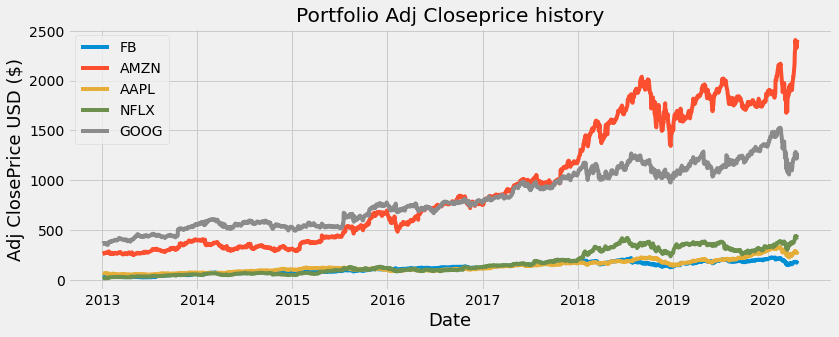

In [58]:
# show adjusted close price

showGraph(stockSymboles)

In [59]:
# calculate simple returns

daily_simple_returns = my_stocks.pct_change(1)

daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-04-20,-0.005579,0.007836,-0.020757,0.034353,-0.012967
2020-04-21,-0.041741,-0.027360,-0.030910,-0.008366,-0.039689
2020-04-22,0.067213,0.015192,0.028804,-0.028606,0.038534


In [60]:
#how returns are calculated
(27.77/28) -1

# stock correlation

daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.499974,0.426950,0.342111,0.555041
AMZN,0.499974,1.000000,0.421013,0.435340,0.603846
AAPL,0.426950,0.421013,1.000000,0.246915,0.525706
NFLX,0.342111,0.435340,0.246915,1.000000,0.415371
GOOG,0.555041,0.603846,0.525706,0.415371,1.000000


In [61]:
# covariance matrix for simple returns

daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000459,0.000204,0.000159,0.000214,0.000189
AMZN,0.000204,0.000362,0.000140,0.000242,0.000183
AAPL,0.000159,0.000140,0.000304,0.000126,0.000146
NFLX,0.000214,0.000242,0.000126,0.000853,0.000193
GOOG,0.000189,0.000183,0.000146,0.000193,0.000254


In [62]:
# show variance

daily_simple_returns.var()

Symbols
FB      0.000459
AMZN    0.000362
AAPL    0.000304
NFLX    0.000853
GOOG    0.000254
dtype: float64

In [63]:
# print the standard deviation for daily simple returns

print("The Stock Volitilty: ")
daily_simple_returns.std()

The Stock Volitilty: 


Symbols
FB      0.021417
AMZN    0.019037
AAPL    0.017440
NFLX    0.029198
GOOG    0.015935
dtype: float64

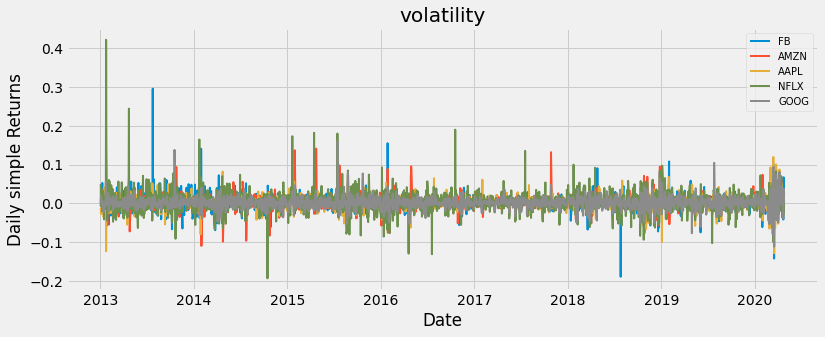

In [64]:
# graph simple daily returns

plt.figure(figsize=(12,4.5))

# loop each stock and plot 
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw=2, label=c)

plt.legend(loc='upper right', fontsize = 10)
plt.title('volatility')
plt.xlabel('Date')
plt.ylabel('Daily simple Returns')
plt.show()

In [71]:
# mean for daily simple return

dailyMeanSimpleReturns= daily_simple_returns.mean()

print(dailyMeanSimpleReturns)

Symbols
FB      0.001268
AMZN    0.001397
AAPL    0.000922
NFLX    0.002302
GOOG    0.000815
dtype: float64


In [72]:
# calculate the expected portfolio daily returns

randomWeights = np.array([0.4,0.1,0.3,0.1,0.1]) # 40% to Fb, 10% to amzn, 30% to AAPL, 10% to NFLX, 10% goog

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

print(" epxected daily return: "+ str(portfolioSimpleReturn))

 epxected daily return: 0.0012350662528679314


In [73]:
# yearly simpple returns

print ("expected annualized portfolio simple return: "+ str(portfolioSimpleReturn * 253))

expected annualized portfolio simple return: 0.3124717619755866


In [74]:
# calculate Growth of our investment

dailyCumulSimpleReturn= (daily_simple_returns+1).cumprod()

#cumlative simple returns

dailyCumulSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2020-04-20,6.365714,9.302437,4.031736,33.283663,3.515679
2020-04-21,6.100000,9.047919,3.907113,33.005215,3.376147
2020-04-22,6.510000,9.185380,4.019652,32.061080,3.506242


In [76]:

#calculate cumulative retuns

# period_1 + 1* (period_2 +1)  

# (daily_simple_returns["GOOG"][1] +1) * (daily_simple_returns ["GOOG"][2] +1)



1.0203525854692204

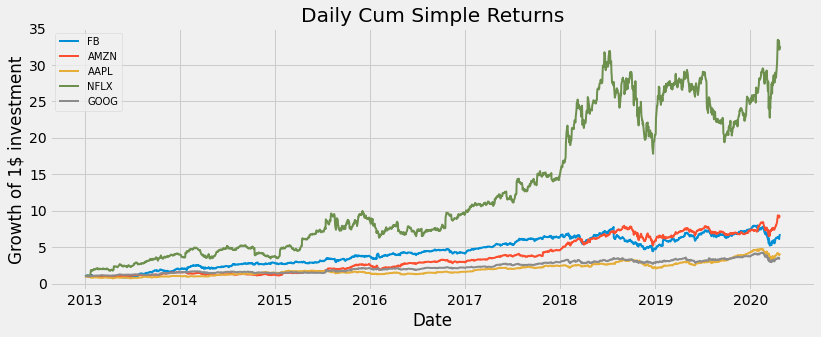

In [81]:
plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimpleReturn.columns.values:
  plt.plot(dailyCumulSimpleReturn.index, dailyCumulSimpleReturn[c], lw=2 ,label=c)

plt.legend(loc="upper left", fontsize=10)
plt.xlabel('Date')
plt.ylabel("Growth of 1$ investment")
plt.title("Daily Cum Simple Returns")
plt.show()